   PostalCode       Lat        Long Cell Level        Cell Token
0       98265  1.238588  103.832674         30  31da1ea4b72a9b35
1       98308  1.239151  103.837338         30  31da1ebbb9327b5d
2       98309  1.239947  103.838327         30  31da1ebbd2a2fc21
3       98116  1.240697   103.83625         30  31da1eba58460edf
4       98209  1.240743   103.83865         30  31da1eba242aba47
5       98207  1.240771  103.838695         30  31da1eba26856957
6       98204   1.24078  103.838659         30  31da1eba269d4723
7       98205   1.24078  103.838686         30  31da1eba269b2473
8       98202  1.240825  103.838695         30  31da1eba26a33b7d
9       98206  1.240834  103.838695         30  31da1eba26a4bb61
Total Geometries: 374


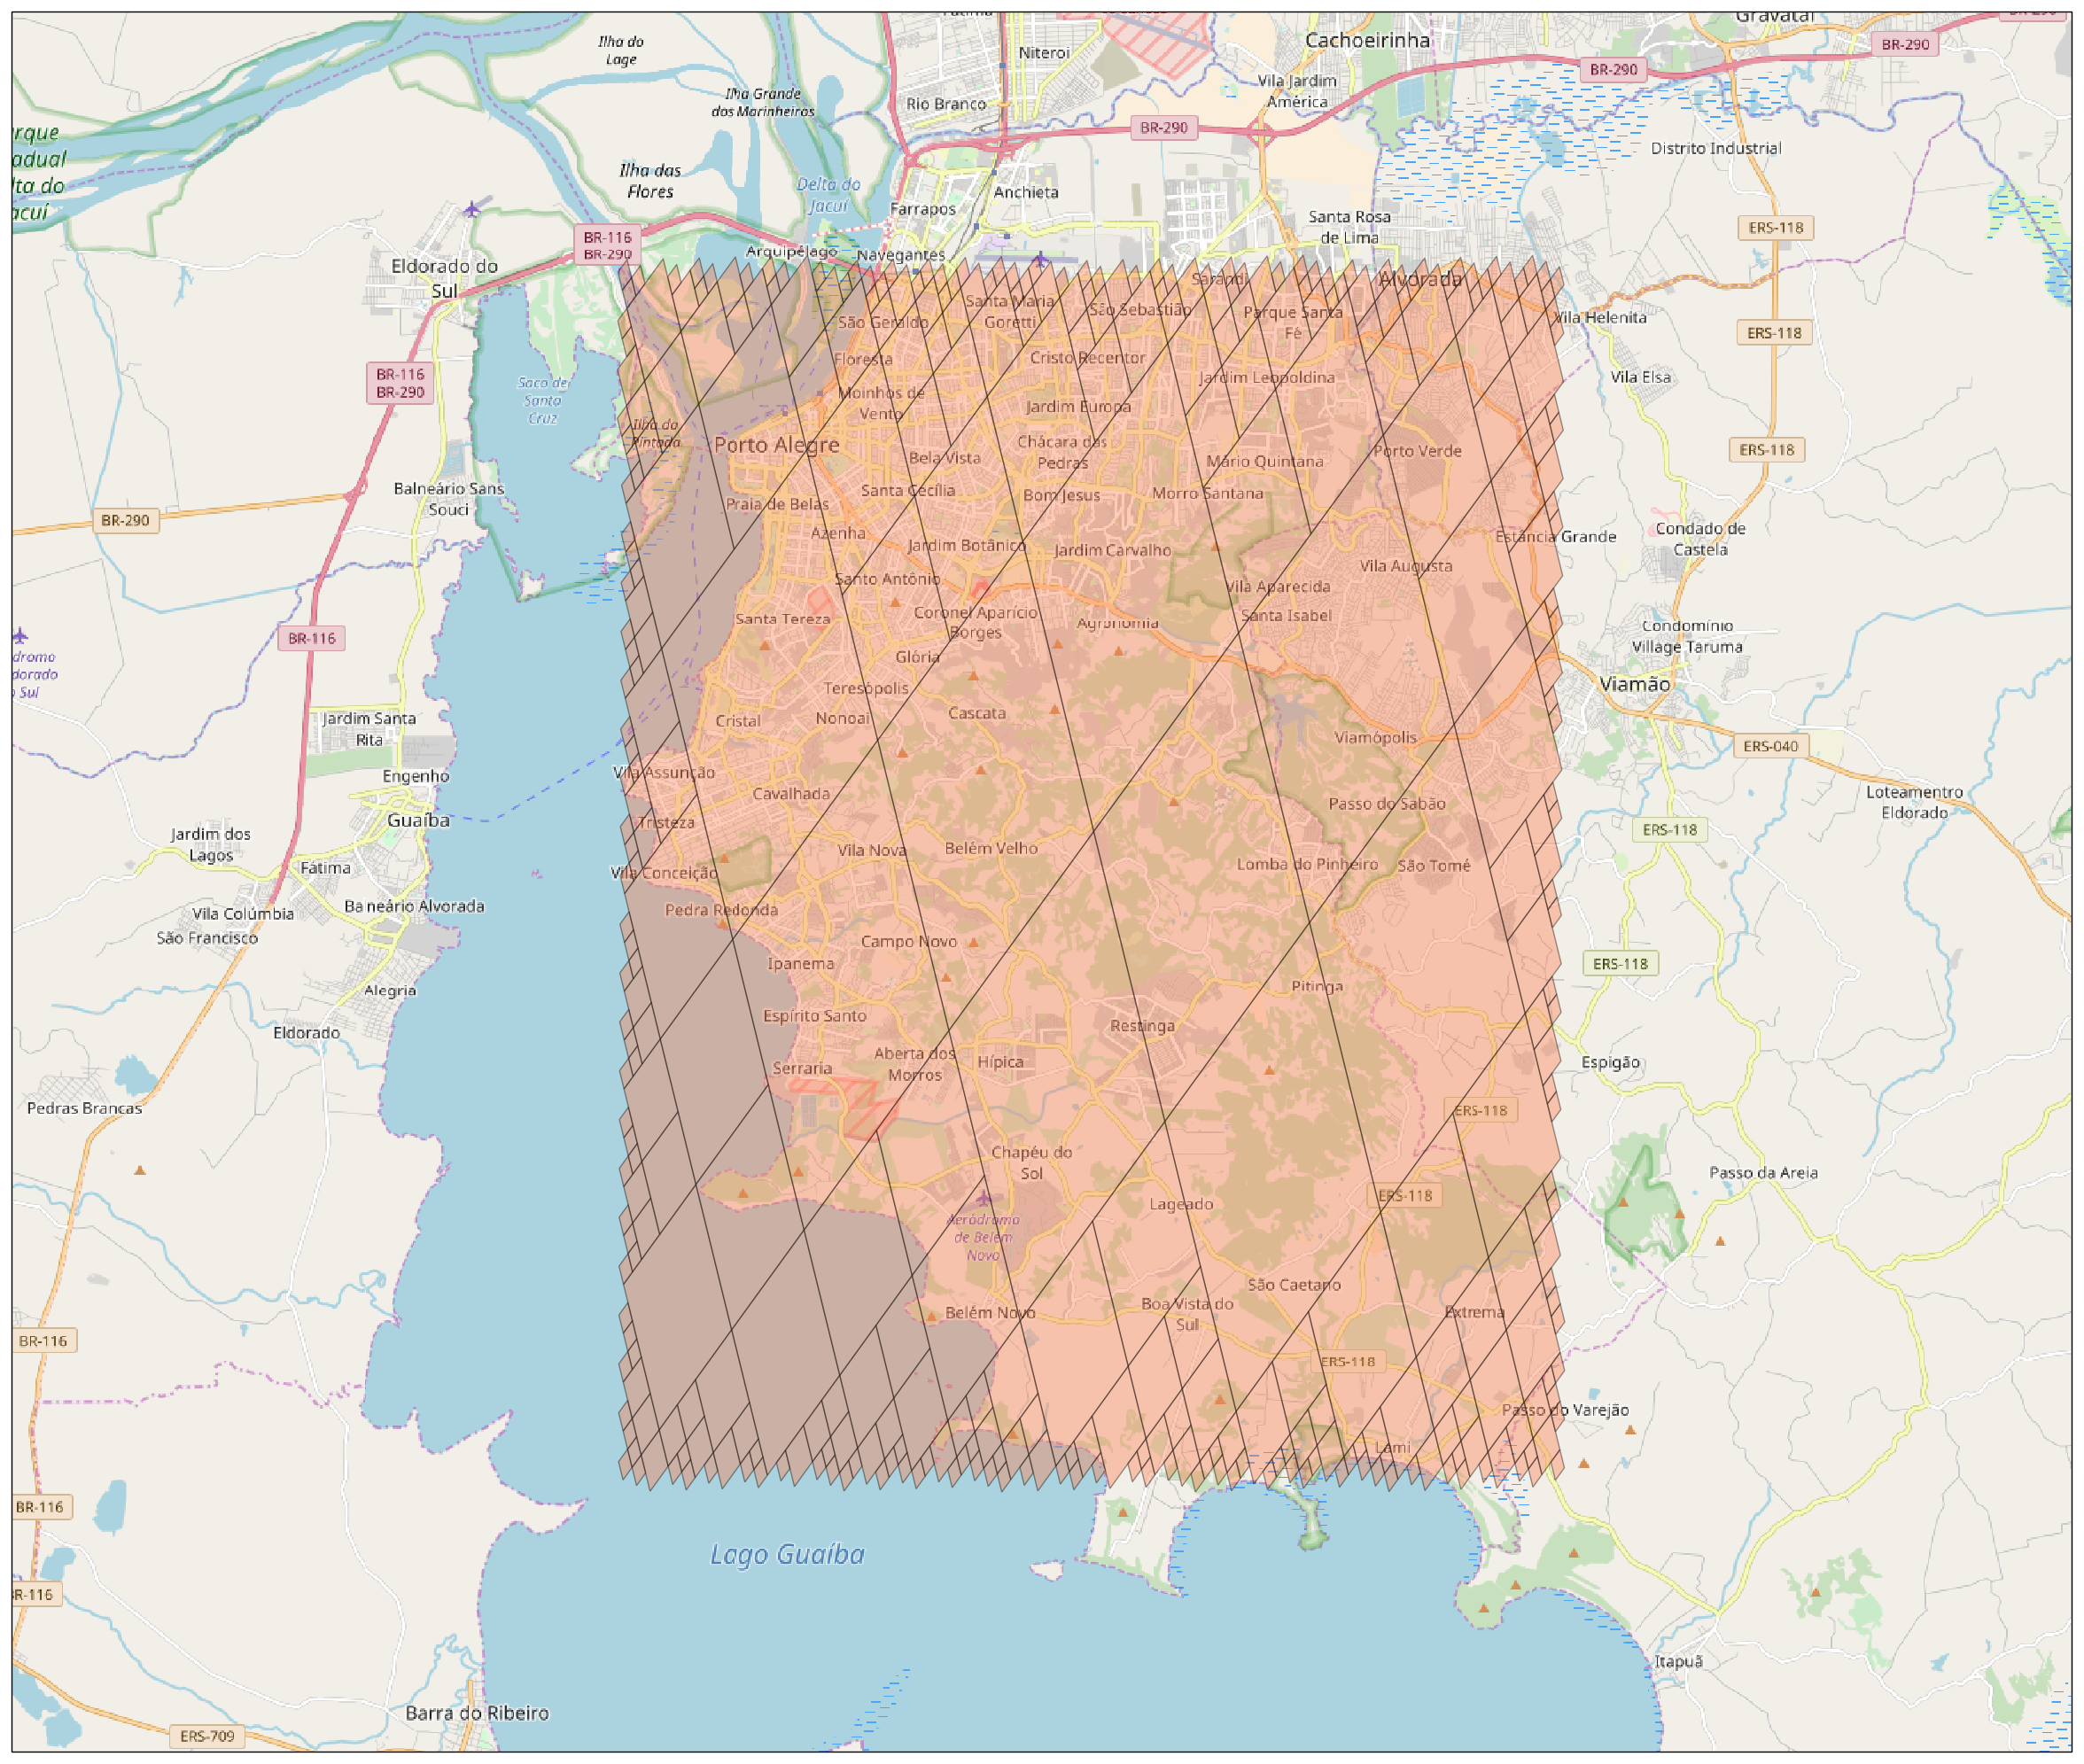

In [62]:
import s2sphere as s2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely import geometry
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

COLUMN_CELL_LEVEL = "Cell Level"
COLUMN_CELL_TOKEN = "Cell Token"
COLUMN_LAT = "Lat"
COLUMN_LONG = "Long"
COLUMN_POSTAL_CODE = "PostalCode"

# ==========================================UTILITY============================================
def plotLatLong(row):
    latlng = s2.LatLng.from_degrees(float(row['Lat']), float(row['Long']))
    cell = s2.CellId.from_lat_lng(latlng)
    row[COLUMN_CELL_LEVEL] = cell.level()
    row[COLUMN_CELL_TOKEN] = cell.to_token()
    return row

def formatData(df):
    # Change column names
    df.columns = ['LatLong', COLUMN_POSTAL_CODE]
    
    # Split LatLong into different columns
    df[COLUMN_LAT], df[COLUMN_LONG] = df['LatLong'].str.split(',', 1).str
    df = df[df.columns[1:]]
    df[COLUMN_CELL_LEVEL] = None
    df[COLUMN_CELL_TOKEN] = None
    df = df.head(n=10)
#     echo data
#     print df.head(n=6)
    return df
# ==========================================UTILITY============================================


df = pd.read_csv("~/Downloads/pincodes_with_lat_long.csv")
df = formatData(df)

for index, row in df.iterrows():
    row = plotLatLong(row)
    df.loc[index] = row
    
print(df)

proj = cimgt.OSM()
plt.figure(figsize=(30,30), dpi=100)
ax = plt.axes(projection=proj.crs)
ax.add_image(proj, 12)
ax.set_extent([-51.411886, -50.922470,
               -30.301314, -29.94364])
region_rect = s2.LatLngRect(
    s2.LatLng.from_degrees(-51.264871, -30.241701),
    s2.LatLng.from_degrees(-51.04618, -30.000003))
coverer = s2.RegionCoverer()
coverer.min_level = 8
coverer.max_level = 15
coverer.max_cells= 500
covering = coverer.get_covering(region_rect)
geoms = []
for cellid in covering:
    new_cell = s2.Cell(cellid)
    vertices = []
    for i in xrange(0, 4):
        vertex = new_cell.get_vertex(i)
        latlng = s2.LatLng.from_point(vertex)
        vertices.append((latlng.lat().degrees,
                         latlng.lng().degrees))
    geo = Polygon(vertices)
    geoms.append(geo)
print "Total Geometries: {}".format(len(geoms))
    
ax.add_geometries(geoms, ccrs.PlateCarree(), facecolor='coral',
                  edgecolor='black', alpha=0.4)
plt.show()
    

